In [10]:
import pandas as pd
import openpyxl
import matplotlib.pyplot as plt # matplotlib para criar o gráfico dendoframa
from scipy.cluster.hierarchy import dendrogram, linkage # scipy.cluster.hierarchy import funções do tipo linkage = método de ligação
from sklearn.cluster import AgglomerativeClustering # sklearn.cluster import AgglomerativeClustering - executa um agrupamento hierarquico
from sklearn.preprocessing import StandardScaler # from sklearn.preprocessing pacote/ modulo que fornece funções do tipo: StandardScaler - Padroniza os dados.

In [11]:
dendograma_df = pd.read_excel("/home/vfamim/Documentos/DATA SCIENCE/Inteligencia_Analitica/comportamento_consumidores.xlsx")
dendograma_df.head()

,id,Segmento,Preco,Internacional,Interurbano,Local
0,1,Grandes Empresas,115.2,4.3,23.5,150
1,2,Grandes Empresas,120.8,4.3,24.5,190
2,3,Grandes Empresas,125.6,4.8,24.5,150
3,4,Grandes Empresas,136.0,7.3,26.0,70
4,5,Grandes Empresas,121.6,7.7,25.0,110


In [12]:
dendograma_df.shape

(20, 6)

In [13]:
df = dendograma_df.loc[:,"Preco":"Local"]
df.head()

,Preco,Internacional,Interurbano,Local
0,115.2,4.3,23.5,150
1,120.8,4.3,24.5,190
2,125.6,4.8,24.5,150
3,136.0,7.3,26.0,70
4,121.6,7.7,25.0,110


In [15]:
# StandardScaler - Padroniza as variáveis para média 0 e DP 1.
# scaler.fit_transform - ajusta e depois padroniza
scaler = StandardScaler()
base = scaler.fit_transform(df)
base

array([[ 0.39333561, -0.47460365,  0.35109498,  0.00779468],
       [ 0.63069331, -0.47460365,  0.62116805,  0.63136906],
       [ 0.83414276, -0.1177588 ,  0.62116805,  0.00779468],
       [ 1.27494991,  1.66646546,  1.02627765, -1.23935408],
       [ 0.66460155,  1.95194134,  0.75620458, -0.6157797 ],
       [ 0.42724385, -1.54513821,  0.21605845,  1.25494344],
       [ 1.44449112, -0.68871056,  1.43138724,  1.41083704],
       [ 0.56287682, -0.54597262,  0.35109498,  1.87851782],
       [-1.13253529, -0.47460365, -0.18905115, -0.7716733 ],
       [-0.6578199 , -0.40323468, -0.99927034, -1.08346049],
       [ 0.25770264, -0.40323468,  0.21605845,  0.47547547],
       [-1.03081057, -0.26049674, -0.45912421,  0.00779468],
       [ 0.08816143,  0.02497914, -0.32408768, -0.6157797 ],
       [ 0.59678506,  1.88057237,  0.35109498,  0.63136906],
       [ 0.56287682,  2.09467928,  0.75620458, -1.39524768],
       [-2.1836908 , -0.83144851, -2.88978179,  0.00779468],
       [ 0.12206967, -0.

Text(0, 0.5, 'Distância Euclidiana')

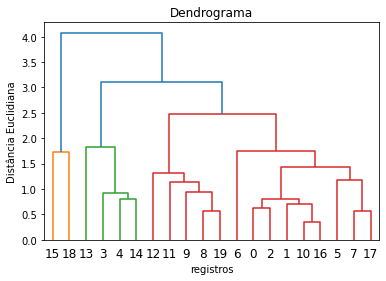

In [16]:
# Função dendograma é da biblioteca scipy.cluster.hierarchy.dendrogram.
# Linkage = ligação(dados/ base, method = )
dendrograma = dendrogram(linkage(base, method = 'average'))
plt.title('Dendrograma')
plt.xlabel('registros')
plt.ylabel('Distância Euclidiana')

In [17]:
# AgglomerativeClustering - classe do metodo aglomerativo
# affinity parametro para calcular a distancia euclidiana
# fit_predict - Ajuste o clustering hierárquico de recursos ou matriz de distância e retorne rótulos de cluster.
hc = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage = 'average')
grupo = hc.fit_predict(base)
grupo

array([2, 2, 2, 0, 0, 2, 2, 2, 3, 3, 2, 3, 3, 0, 0, 1, 2, 2, 1, 3])

In [18]:
df['grupo']=grupo
df.head()

,Preco,Internacional,Interurbano,Local,grupo
0,115.2,4.3,23.5,150,2
1,120.8,4.3,24.5,190,2
2,125.6,4.8,24.5,150,2
3,136.0,7.3,26.0,70,0
4,121.6,7.7,25.0,110,0


In [19]:
df['grupo'].value_counts()

2    9
3    5
0    4
1    2
Name: grupo, dtype: int64

In [20]:
# Dados padronizados
base_df = pd.DataFrame(base,columns=['Preco','Internacional','Interurbano','Local'] )
base_df['grupo']=grupo
base_df

,Preco,Internacional,Interurbano,Local,grupo
0,0.393336,-0.474604,0.351095,0.007795,2
1,0.630693,-0.474604,0.621168,0.631369,2
2,0.834143,-0.117759,0.621168,0.007795,2
3,1.274950,1.666465,1.026278,-1.239354,0
4,0.664602,1.951941,0.756205,-0.615780,0
5,0.427244,-1.545138,0.216058,1.254943,2
6,1.444491,-0.688711,1.431387,1.410837,2
7,0.562877,-0.545973,0.351095,1.878518,2
8,-1.132535,-0.474604,-0.189051,-0.771673,3
9,-0.657820,-0.403235,-0.999270,-1.083460,3


In [21]:
# Criar grafico para entender os cluster
tabela = base_df[['grupo', 'Preco','Internacional','Interurbano','Local']].groupby(['grupo']).mean()
tabela

,Preco,Internacional,Interurbano,Local
grupo,,,,
0,0.774803,1.898415,0.722445,-0.654753
1,-2.115874,-0.545973,-2.484672,-0.693726
2,0.562877,-0.577692,0.486132,0.856549
3,-0.786671,-0.260497,-0.459124,-0.740495


In [23]:
### Salvando excel
### index = False não salva o índice do arquivo.
escrever = pd.ExcelWriter('/home/vfamim/Documentos/DATA SCIENCE/Inteligencia_Analitica/tabela_01.xlsx')
tabela.to_excel(escrever, index=False)
escrever.save()

In [24]:
dendograma_df.shape

(20, 6)

In [25]:
dendograma_df['grupo']=grupo
dendograma_df.head()

,id,Segmento,Preco,Internacional,Interurbano,Local,grupo
0,1,Grandes Empresas,115.2,4.3,23.5,150,2
1,2,Grandes Empresas,120.8,4.3,24.5,190,2
2,3,Grandes Empresas,125.6,4.8,24.5,150,2
3,4,Grandes Empresas,136.0,7.3,26.0,70,0
4,5,Grandes Empresas,121.6,7.7,25.0,110,0


In [26]:
dendograma_df['grupo']

0     2
1     2
2     2
3     0
4     0
5     2
6     2
7     2
8     3
9     3
10    2
11    3
12    3
13    0
14    0
15    1
16    2
17    2
18    1
19    3
Name: grupo, dtype: int64

In [27]:
#import numpy as np
dendograma_df['grupo']= dendograma_df['grupo'].map ({0:'Diamante', 1:'Ouro', 2:'Prata', 3:'Bronze'})
dendograma_df.head()

,id,Segmento,Preco,Internacional,Interurbano,Local,grupo
0,1,Grandes Empresas,115.2,4.3,23.5,150,Prata
1,2,Grandes Empresas,120.8,4.3,24.5,190,Prata
2,3,Grandes Empresas,125.6,4.8,24.5,150,Prata
3,4,Grandes Empresas,136.0,7.3,26.0,70,Diamante
4,5,Grandes Empresas,121.6,7.7,25.0,110,Diamante


In [28]:
dendograma_df['grupo'].value_counts()

Prata       9
Bronze      5
Diamante    4
Ouro        2
Name: grupo, dtype: int64

In [29]:
pd.crosstab(dendograma_df.Segmento, dendograma_df.grupo)

grupo,Bronze,Diamante,Ouro,Prata
Segmento,,,,
Grandes Empresas,0,2,0,3
Médias Empresas,4,2,0,4
Pequenas Empresas,1,0,2,2
